In [36]:
# %load dft.py
%matplotlib inline
import numpy as np
from matplotlib import pyplot as plt
import scipy.signal as sp

### Downsampling

In [59]:
f0=5000.
fs=22500.
ns=30.
n=np.linspace(0,ns-1,ns)
#x=(np.cos(2*np.pi*f0/fs*n)+np.cos(2*np.pi*0.5*f0/fs*n))
#x=np.random.randn(ns)
x=np.arange(5)
x

array([0, 1, 2, 3, 4])

In [60]:
### Downsampling by M

In [61]:
# FIR low pass 
M=2
N=4
fpass=3000
fstop=4000
h=sp.remez(N,np.array([0, fpass, fstop, fs/(2*M)]), [1,0], Hz = fs)  

In [65]:
def drop(x,M):
	sig=[x[i*M] for i in range(int(5/M))]
	return np.array(sig)

#x_=drop(np.convolve(x, h),M)

n_=np.linspace(0,len(x_)-1,len(x_))

z=drop(x,M)
'''
plt.subplot(2,1,1)
plt.stem(n,x)
plt.xlim(0,max(n))
plt.xlabel("n")
plt.ylabel("Amplitude")
plt.title("Input")
plt.subplot(2,1,2)
plt.stem(n_,x_)
plt.xlim(0,max(n_))
plt.title("Output")
plt.xlabel("n")
plt.ylabel("Amplitude")
plt.tight_layout()
plt.show()
'''
z

array([0, 2])

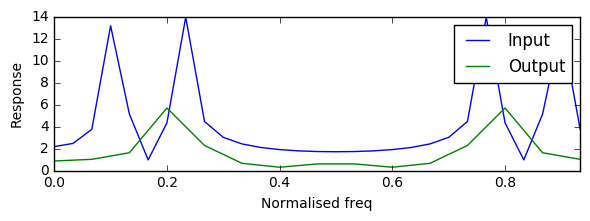

In [41]:
X=np.fft.fft(x)
X_=np.fft.fft(x_)
Xn=np.fft.fft(drop(x,M))
normf=n/ns

normf_=n_/float(len(X_))
plt.subplot(2,1,1)
plt.plot(normf,abs(X),label="Input")
plt.plot(normf_,abs(X_),label="Output")
plt.xlim(0,max(normf_))
plt.legend(loc=1)
plt.xlabel("Normalised freq")
plt.ylabel("Response")
plt.tight_layout()
plt.show()


### Upsampling

In [57]:
L=2
N=4
fpass=3000
fstop=4000
h=sp.remez(N,np.array([0, fpass, fstop, fs]), [1,0], Hz = L*fs)  

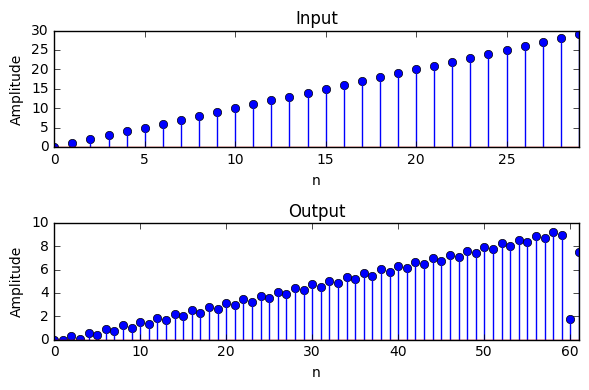

array([  0.,   0.,   1.,   0.,   2.,   0.,   3.,   0.,   4.,   0.,   5.,
         0.,   6.,   0.,   7.,   0.,   8.,   0.,   9.,   0.,  10.,   0.,
        11.,   0.,  12.,   0.,  13.,   0.,  14.,   0.,  15.,   0.,  16.,
         0.,  17.,   0.,  18.,   0.,  19.,   0.,  20.,   0.,  21.,   0.,
        22.,   0.,  23.,   0.,  24.,   0.,  25.,   0.,  26.,   0.,  27.,
         0.,  28.,   0.,  29.])

In [58]:
### Upsampling
def inc_pad(x,L):
	size=(L-1)*(len(x)-1)+len(x)
	z=np.zeros(size,)
	for i in range(len(x)):
		z[i*L]=x[i]
	return z

x_=np.convolve(inc_pad(x, L),h) 
n_=np.linspace(0,len(x_)-1,len(x_))

u=inc_pad(x,L)

plt.subplot(2,1,1)
plt.stem(n,x)
plt.xlim(0,max(n))
plt.xlabel("n")
plt.ylabel("Amplitude")
plt.title("Input")
plt.subplot(2,1,2)
plt.stem(n_,x_)
plt.xlim(0,max(n_))
plt.title("Output")
plt.xlabel("n")
plt.ylabel("Amplitude")
plt.tight_layout()
plt.show()
u

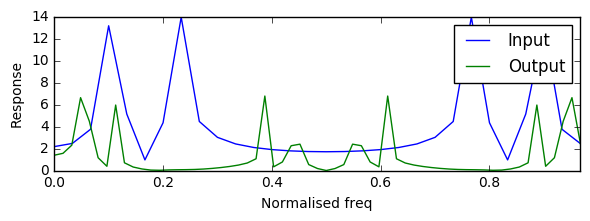

In [44]:
X=np.fft.fft(x)
X_=np.fft.fft(x_)
Xn=np.fft.fft(drop(x,M))

normf=n/ns
normf_=n_/float(len(X_))

plt.subplot(2,1,1)
plt.plot(normf,abs(X),label="Input")
plt.plot(normf_,abs(X_),label="Output")
plt.xlim(0,max(normf))
plt.legend(loc=1)
plt.xlabel("Normalised freq")
plt.ylabel("Response")
plt.tight_layout()
plt.show()

### Upsample by 1.5

In [49]:
L=5
M=2
N=4
fpass=3000
fstop=4000
h1=sp.remez(N,np.array([0, fpass, fstop, fs]), [1,0], Hz = L*fs)  
h2=sp.remez(N,np.array([0, fpass, fstop, (L*fs)/(2.*M)]), [1,0], Hz = L*fs)  

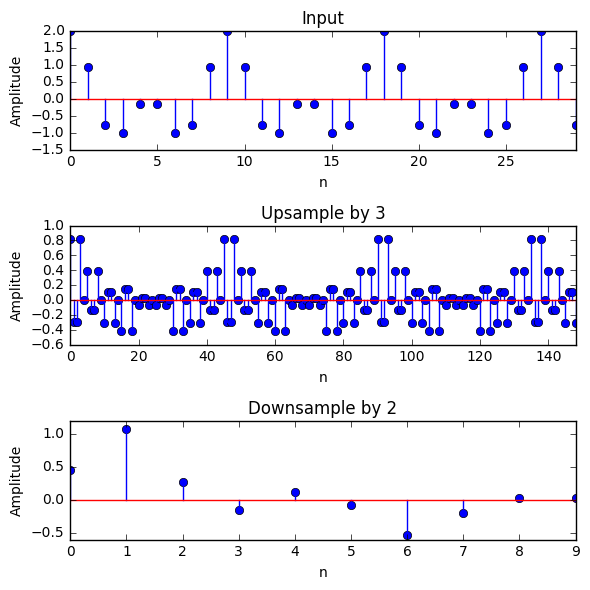

In [50]:
#upsampling by 3
y1=np.convolve(inc_pad(x,L),h1)

#downsampling by 2
y2=drop(np.convolve(y1,h2), M)

n1=np.linspace(0,len(y1)-1,len(y1))
n2=np.linspace(0,len(y2)-1,len(y2))

normf2=n1/float(len(y1))
normf2=n2/float(len(y2))

plt.figure(figsize=(6,6))
plt.subplot(3,1,1)
plt.stem(n,x)
plt.xlim(0,max(n))
plt.xlabel("n")
plt.ylabel("Amplitude")
plt.title("Input")
plt.subplot(3,1,2)
plt.stem(n1,y1)
plt.xlim(0,max(n1))
plt.xlabel("n")
plt.ylabel("Amplitude")
plt.title("Upsample by 3")
plt.subplot(3,1,3)
plt.stem(n2,y2)
plt.xlim(0,max(n2))
plt.title("Downsample by 2")
plt.xlabel("n")
plt.ylabel("Amplitude")
plt.tight_layout()
plt.show()